# Gradient Descent with Applications to Linear Regression

By: Laura Moses

---

## Definition

**Gradient Descent** is the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

---

### Stochastic Gradient Descent
**Stochastic Gradient Descent** minimizes the error of a model on training data by showing each training instance to the model one at a time. The model then makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

This procedure can be used to find the set of coefficients in a model that result in the smallest error for the model on the training data. Each iteration the coefficients, called weights ($w$) in machine learning language are updated using the equation:

$$w = w – \alpha \cdot \delta$$

Where $w$ is the coefficient or weight being optimized, $\alpha$ is a learning rate that you must configure, and gradient is the error for the model on the training data attributed to the weight.

---

### Batch Gradient Descent
In **Batch Gradient Descent**, all of the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that *mean gradient* to update our parameters. So that’s just one step of gradient descent in one epoch. When working with very large datasets, batch gradient descent is less efficient than stochastic gradient descent.  

---

### Example of Unconstrained Optimization
This notebook introduces gradient descent, stochastic gradient descent, with applications to linear regression. To begin, consider the following [unconstrained optimization](https://neos-guide.org/content/unconstrained-optimization) problem, namely

$$\underset{x\in \mathbb{R}^n}{min} f(x),$$

where $x$ is a real valued $n$-dimensional vector with no restrictions on the values of its components, and $f(x):\mathbb{R}^n \rightarrow \mathbb{R}$ is a real valued smooth function. 

The most obvious choice for developing a minimization algorithm for finding local minima (sometimes global minima!) is to start at a point $x_k$ and evaluate whether the function is increasing or decreasing at $x^k$. Once this information is found we may then take a step in a direction of descent, i.e., calculate the sign of $\nabla f(x^k)$ and then step in the opposite direction. This leads to the following iterative update rule known as *gradient descent:*
$$x^{k+1} = x^k - \alpha \nabla f(x^k)$$

Here, $\alpha$ is the `step length` (the distance for which we move to a new point in the direction of descent), also called the `learning rate`.

We demonstrate this iterative method with the function

$$f(x, y) = 3(x-4)^2 + y^2$$

with gradient 

$$
\begin{align}
    \nabla f(x,y) = \begin{bmatrix}
           6(x-4) \\
           2y \end{bmatrix}
\end {align}
$$

---

The following packages will be needed to run the code below: 

* Plots [documentation](http://docs.juliaplots.org/latest/)
* Random [documentationra](https://docs.julialang.org/en/v1/stdlib/Random/)
* CSV [documentation](https://csv.juliadata.org/stable/)
* DataFrames [documentation](https://dataframes.juliadata.org/stable/)

---

---

We begin by defining the function $f(x, y)$ and it's gradient below: 

---

In [1]:
using Plots
using Random 
using CSV
using DataFrames

In [2]:
f(x, y) = 3*(x-4)^2 + y^2
∇f(x,y) = [6*(x-4), 2*y]

∇f (generic function with 1 method)

---

The following code cell plots the 3-dimensional image of $f(x,y)$

---

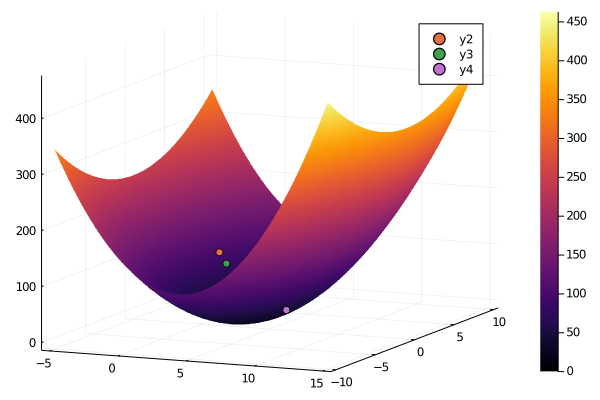

In [8]:
x = -5:0.5:15
y = -10:0.5:10

plot(x, y, f, st=:surface)
scatter!([(x0[1], x0[2], f(x0[1], x0[2]))])
scatter!([(x1[1], x1[2], f(x1[1], x1[2]))])
scatter!([(x2[1], x2[2], f(x2[1], x2[2]))])

---

For our learning purposes, we will visualize the contour plot of $f(x,y)$ instead of the 3-dimensional plot above. The following code cell demonstrates how to plot this way. 

---

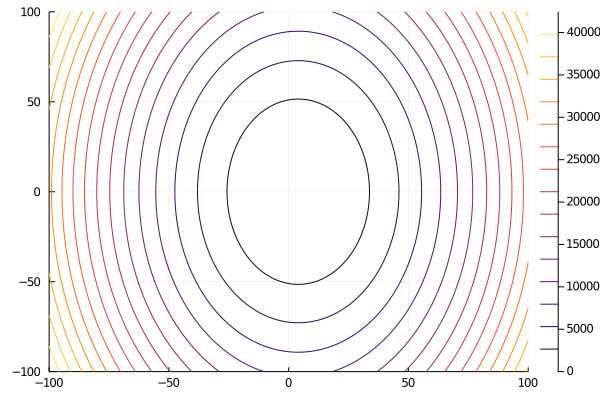

In [4]:
x = -100:0.5:100
y = -100:0.5:100

p1 = contour(x, y, f)
plot(p1, legend = false)

---

In the contour plot below, we start by plotting a point, choosing $x_0 = (-1, 4)$ and learning rate of $\alpha = 0.02$.

---

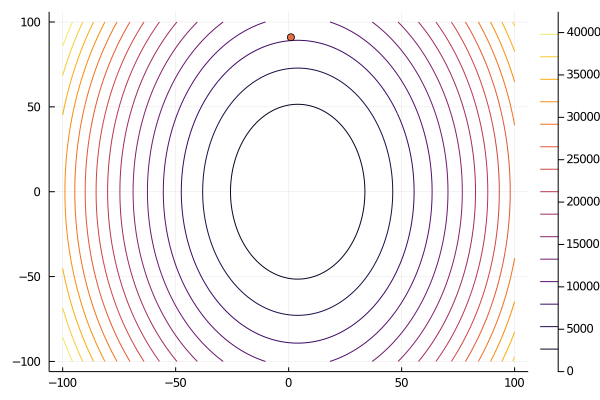

In [5]:
x0 = [-1, 4]
scatter!([f(x0[1], x0[2])])

----

Now we plot $x_1$, in green, by updating using the gradient:

---

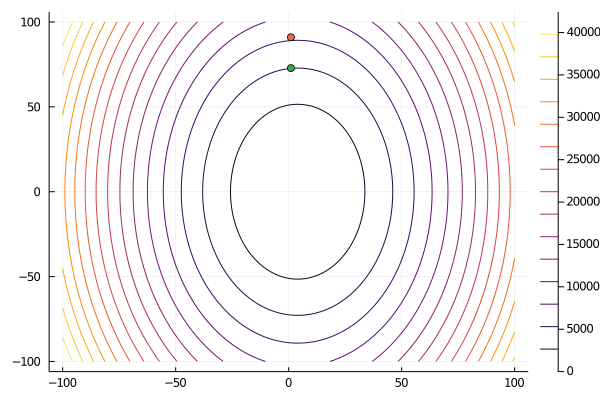

In [6]:
x1 = x0 - 0.02*∇f(x0[1], x0[2])
scatter!([f(x1[1], x1[2])])

---

The purple point below, $x_2$, shows our second iteration of the gradient descent. You can see we are now close to the center of the contour plot. 

---

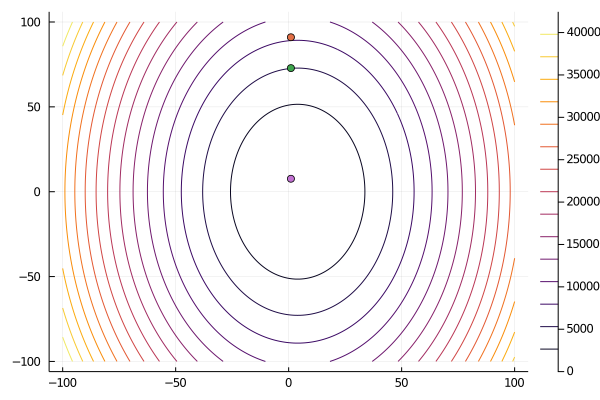

In [7]:
x2 = x1 - 0.2*∇f(x1[1], x1[2])
scatter!([f(x2[1], x2[2])])

---

## Applications to Linear Regression

In statistics, simple linear regression is a linear approach to modelling the relationship between a dependent, response variable and one or more independent, predictor variables. Let $x$ be the predictor variable and $y$ be the response variable. We will define a linear relationship between these two variables as follows:

$$y = w \cdot x + b$$

The coefficients $w$ and $b$ can be found analytically using gradient descent such that the line corresponding to those values is the best fitting line or gives the minimum error.

The implementation below using [Advertising](https://www.kaggle.com/bumba5341/advertisingcsv) data which can be found in this repository. It is a $200x5$ dataframe with columns for row number, `TV`, `radio`, `newspaper`, and `sales` advertising spending data.

---

In [9]:
data = CSV.read("Advertising.csv", DataFrame)

,Column1,TV,radio,newspaper,sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


---

Because we will be performing simple linear regression, we choose one regressor variable for $x$, `TV` along with the response $y$, `sales`. Then we create ordered pairs of the $(x,y)$ data. 

---

In [10]:
# Define x and y data
x_data = data.TV
y_data = data.sales

# Create (x,y) ordered pairs
data_tuples = [x for x in zip(x_data, y_data)]

200-element Array{Tuple{Float64,Float64},1}:
 (230.1, 22.1)
 (44.5, 10.4)
 (17.2, 9.3)
 (151.5, 18.5)
 (180.8, 12.9)
 (8.7, 7.2)
 (57.5, 11.8)
 (120.2, 13.2)
 (8.6, 4.8)
 (199.8, 10.6)
 (66.1, 8.6)
 (214.7, 17.4)
 (23.8, 9.2)
 ⋮
 (286.0, 15.9)
 (18.7, 6.7)
 (39.5, 10.8)
 (75.5, 9.9)
 (17.2, 5.9)
 (166.8, 19.6)
 (149.7, 17.3)
 (38.2, 7.6)
 (94.2, 9.7)
 (177.0, 12.8)
 (283.6, 25.5)
 (232.1, 13.4)

---

Because this is a linear regression problem, we plot the $(x,y)$ data to determine if there does appear to be a linear relationship between the two variables: 

---

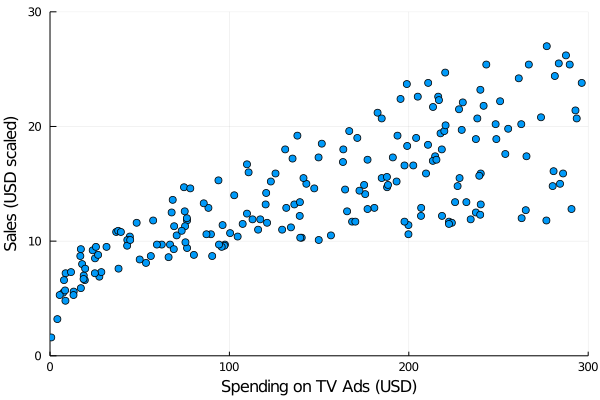

In [11]:
scatter(data_tuples, 
         xlim = (0, 300), 
         ylim = (0, 30), 
         xaxis = "Spending on TV Ads (USD)", 
         yaxis = "Sales (USD scaled)", 
         legend = false)

---

There is a clear positive correction between the spending on TV ads and sales data. Thus, we move forward with our cost/error function below, given by: 

$$Cost = \frac{1}{n}\sum_{i=0}^n(y_i-\bar y_i)^2 = \frac{1}{n}\sum_{i=0}^n(y_i-(wx_i+b))^2$$

where $y_i$ is the actual value in the dataset and $\bar y_i$ is the predicted value. 

The plot below is of the cost function, given weights and biases from $-50$ to $50$

---

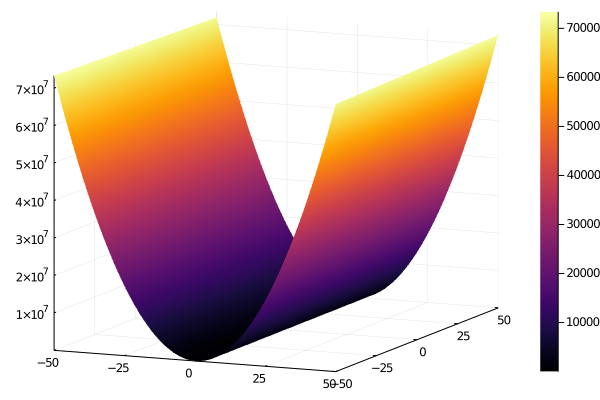

In [12]:
# Cost function
C(w, b) = (1/length(x_data))*sum([(y_data[i] - (w*x_data[i] + b))^2 for i = 1:length(x_data)])

w = -50:0.5:50
b = -50:0.5:50

plot(w, b, C, st = :surface)

---

### Using Batch Gradient Descent

We will now define a batch_gradient_descent to use with our cost function in order to minimize cost, along with a batch training function and average loss which returns the mean square error. 

---

In [13]:
function batch_gradient_descent(x_data, y_data, w, b, α)
    
    N = length(x_data)
    w = w - (-2/N)*α*sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - (-2/N)*α*sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w, b
end

function batch_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println("Epoch ", i, " with cost: ", C(w, b))
        end
        
        if i == 100
            println("Epoch ", i, " with cost: ", C(w, b))
        end
        
        if i == 1000
            println("Epoch ", i, " with cost: ", C(w, b))
        end
        
        if i == 10000
            println("Epoch ", i, " with cost: ", C(w, b))
        end        
        
        if i == 100000
            println("Epoch ", i, " with cost: ", C(w, b))
        end
    end
    return w, b
end


function average_loss(x_data, y_data, w, b)
    N = length(x_data)
    total_error = 0.0
    for i = 1:N
        total_error += (y_data[i] - (x_data[i]*w + b))^2
    end
    
    return total_error
end;

average_loss (generic function with 1 method)

---

Now we will use our batch training function to train our coefficients $w$ and $b$. The plots below depict the progession from 1 epoch (iteration) to 10,000 epochs and the corresponding associated cost. You'll notice that as the epochs increase, the cost goes down.

---

Epoch 1 with cost: 58.586909599170966


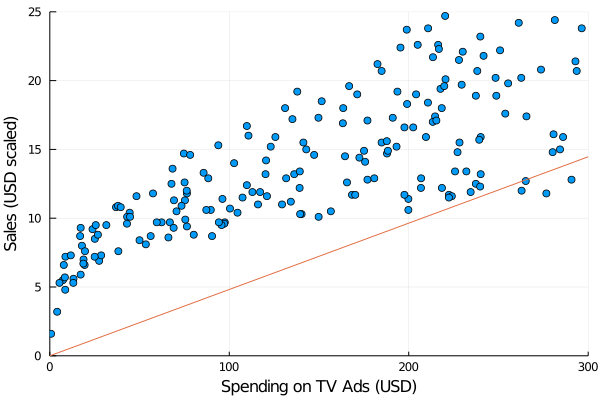

In [14]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1)

scatter(data_tuples, 
         xlim = (0, 300), 
         ylim = (0, 25), 
         xaxis = "Spending on TV Ads (USD)", 
         yaxis = "Sales (USD scaled)", 
         legend = false)
plot!(x->x*w + b,
        xlim = (0,300),
        ylim = (0, 25), 
        legend = false)

Epoch 1 with cost: 58.586909599170966
Epoch 100 with cost: 23.026278283646004


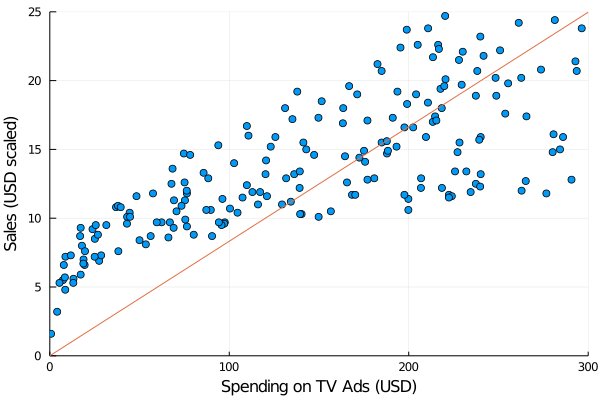

In [15]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 100)

scatter(data_tuples, 
         xlim = (0, 300), 
         ylim = (0, 25), 
         xaxis = "Spending on TV Ads (USD)", 
         yaxis = "Sales (USD scaled)", 
         legend = false)
plot!(x->x*w + b,
        xlim = (0,300),
        ylim = (0, 25), 
        legend = false)

Epoch 1 with cost: 58.586909599170966
Epoch 100 with cost: 23.026278283646004
Epoch 1000 with cost: 22.912694162324474


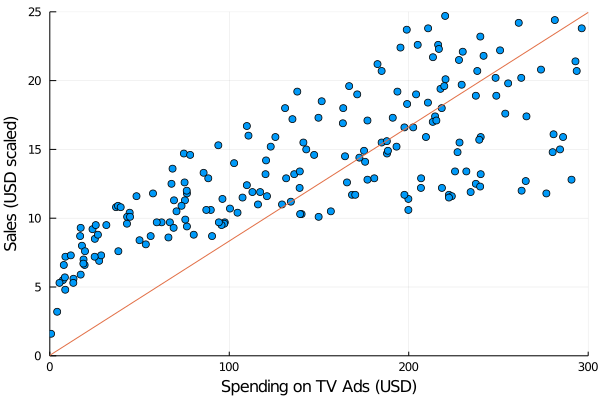

In [16]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1000)

scatter(data_tuples, 
         xlim = (0, 300), 
         ylim = (0, 25), 
         xaxis = "Spending on TV Ads (USD)", 
         yaxis = "Sales (USD scaled)", 
         legend = false)
plot!(x->x*w + b,
        xlim = (0,300),
        ylim = (0, 25), 
        legend = false)

Epoch 1 with cost: 58.586909599170966
Epoch 100 with cost: 23.026278283646004
Epoch 1000 with cost: 22.912694162324474
Epoch 10000 with cost: 21.83204068666527


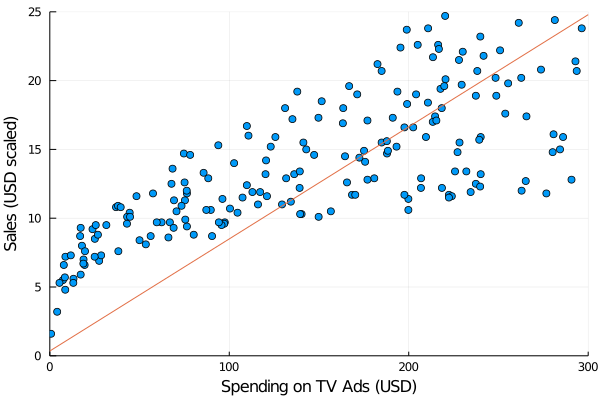

In [17]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples, 
         xlim = (0, 300), 
         ylim = (0, 25), 
         xaxis = "Spending on TV Ads (USD)", 
         yaxis = "Sales (USD scaled)", 
         legend = false)
plot!(x->x*w + b,
        xlim = (0,300),
        ylim = (0, 25), 
        legend = false)

---

### Using Stochastic Gradient Descent

Now we'll train the coefficients using stochastic gradient descent instead and compare results. 

---

In [18]:
function stochastic_gradient_descent(x_data, y_data, w, b, α)
    
    N = length(x_data)
    
    # pick a random i
    i = rand([k for k = 1:N])
    
    # calculate the gradient only at randomly picked point
    w = w - (-2/N)*α*x_data[i]*(y_data[i] - (w*x_data[i] + b))
    b = b - (-2/N)*α*(y_data[i] - (w*x_data[i] + b))
    
    return w, b
end

function stochastic_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println("Epoch ", i, " with cost: ", C(w, b))
        end
        
        if i == 100
            println("Epoch ", i, " with cost: ", C(w, b))
        end
        
        if i == 1000
            println("Epoch ", i, " with cost: ", C(w, b))
        end
        
        if i == 10000
            println("Epoch ", i, " with cost: ", C(w, b))
        end        
        
        if i == 100000
            println("Epoch ", i, " with cost: ", C(w, b))
        end
    end
    return w, b
end;

stochastic_train (generic function with 1 method)

Epoch 1 with cost: 58.586909599170966
Epoch 100 with cost: 23.026278283646004
Epoch 1000 with cost: 22.912694162324474
Epoch 10000 with cost: 21.83204068666527


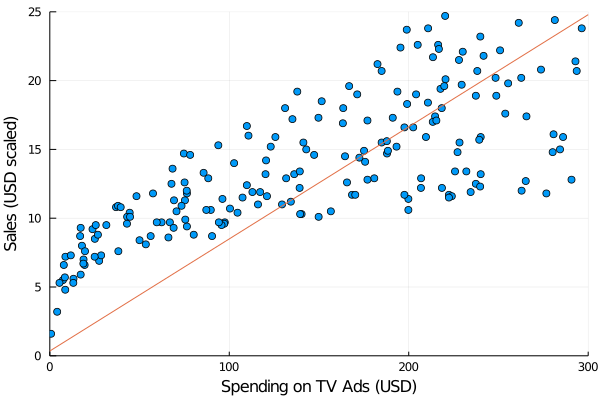

In [19]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples, 
         xlim = (0, 300), 
         ylim = (0, 25), 
         xaxis = "Spending on TV Ads (USD)", 
         yaxis = "Sales (USD scaled)", 
         legend = false)
plot!(x->x*w + b,
        xlim = (0,300),
        ylim = (0, 25), 
        legend = false)

---

### Conclusion 

Using both batch gradient descent and stochastic gradient descent, we got our cost down 21.83 with 10,000 epochs. We saw from the plots above how the predicting line became more accurate and centralized in the data as the epochs increased.

---